# Prototype Web-Scraping Weather Underground Personal Weather Stations

References: [https://www.wunderground.com/weatherstation/ListStations.asp?selectedState=OH&selectedCountry=United+States](https://www.wunderground.com/weatherstation/ListStations.asp?selectedState=OH&selectedCountry=United+States)

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from io import StringIO  # Needed to handle "in-memory string"
from datetime import datetime
# Set global figure size
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['axes.grid.axis'] = 'both'

In [123]:
url = 'http://www.wunderground.com/weatherstation/WXDailyHistory.asp?ID={station}&day={day}&month={month}&year={year}&graphspan=day&format=1'
station2 = 'KOHSIDNE4' # Anna or Sydney, OH
station = 'KOHMARYS6'  # Marysville, OH
day = '8'
month = '5'
year = '2018'
full_url = url.format(station=station, day=day, month=month, year=year)

# Provide user-agent to wunderground so that they will not think you are an unauthorized web-crawler or web bot
response = requests.get(full_url, 
                        headers={'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36'})

In [124]:
data = response.text

In [127]:
df = pd.read_csv(StringIO(data), index_col=False)

In [128]:
df.head()

,Time,TemperatureF,DewpointF,PressureIn,WindDirection,WindDirectionDegrees,WindSpeedMPH,WindSpeedGustMPH,Humidity,HourlyPrecipIn,Conditions,Clouds,dailyrainin,SolarRadiationWatts/m^2,SoftwareType,DateUTC<br>
0,2018-05-08 00:03:00,50.4,36.6,30.17,North,0.0,0.0,0.0,59.0,0.0,NaN,NaN,0.0,0.0,Cumulus v1.9.4,2018-05-08 04:03:00
1,<br>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-05-08 00:08:00,50.4,37.0,30.17,North,0.0,0.0,0.0,60.0,0.0,NaN,NaN,0.0,0.0,Cumulus v1.9.4,2018-05-08 04:08:00
3,<br>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-08 00:13:00,50.2,37.2,30.17,North,0.0,0.0,0.0,61.0,0.0,NaN,NaN,0.0,0.0,Cumulus v1.9.4,2018-05-08 04:13:00


Looking at the data, it looks like our data is "tainted" with the HTML ```<br>``` tag.  So we need to remove them.

In [129]:
data[:800]

'\nTime,TemperatureF,DewpointF,PressureIn,WindDirection,WindDirectionDegrees,WindSpeedMPH,WindSpeedGustMPH,Humidity,HourlyPrecipIn,Conditions,Clouds,dailyrainin,SolarRadiationWatts/m^2,SoftwareType,DateUTC<br>\n2018-05-08 00:03:00,50.4,36.6,30.17,North,0,0.0,0.0,59,0.00,,,0.00,0,Cumulus v1.9.4,2018-05-08 04:03:00,\n<br>\n2018-05-08 00:08:00,50.4,37.0,30.17,North,0,0.0,0.0,60,0.00,,,0.00,0,Cumulus v1.9.4,2018-05-08 04:08:00,\n<br>\n2018-05-08 00:13:00,50.2,37.2,30.17,North,0,0.0,0.0,61,0.00,,,0.00,0,Cumulus v1.9.4,2018-05-08 04:13:00,\n<br>\n2018-05-08 00:18:00,50.2,37.2,30.17,North,0,0.0,0.0,61,0.00,,,0.00,0,Cumulus v1.9.4,2018-05-08 04:18:00,\n<br>\n2018-05-08 00:23:00,50.2,37.7,30.17,North,0,0.0,0.0,62,0.00,,,0.00,0,Cumulus v1.9.4,2018-05-08 04:23:00,\n<br>\n2018-05-08 00:28:00,50.0,37.5,30.17,North,'

In [130]:
data = data.replace('<br>', '')

In [131]:
weather_df = pd.read_csv(StringIO(data), index_col=False)

In [132]:
weather_df.head()

,Time,TemperatureF,DewpointF,PressureIn,WindDirection,WindDirectionDegrees,WindSpeedMPH,WindSpeedGustMPH,Humidity,HourlyPrecipIn,Conditions,Clouds,dailyrainin,SolarRadiationWatts/m^2,SoftwareType,DateUTC
0,2018-05-08 00:03:00,50.4,36.6,30.17,North,0,0.0,0.0,59,0.0,NaN,NaN,0.0,0,Cumulus v1.9.4,2018-05-08 04:03:00
1,2018-05-08 00:08:00,50.4,37.0,30.17,North,0,0.0,0.0,60,0.0,NaN,NaN,0.0,0,Cumulus v1.9.4,2018-05-08 04:08:00
2,2018-05-08 00:13:00,50.2,37.2,30.17,North,0,0.0,0.0,61,0.0,NaN,NaN,0.0,0,Cumulus v1.9.4,2018-05-08 04:13:00
3,2018-05-08 00:18:00,50.2,37.2,30.17,North,0,0.0,0.0,61,0.0,NaN,NaN,0.0,0,Cumulus v1.9.4,2018-05-08 04:18:00
4,2018-05-08 00:23:00,50.2,37.7,30.17,North,0,0.0,0.0,62,0.0,NaN,NaN,0.0,0,Cumulus v1.9.4,2018-05-08 04:23:00


Now our data is fixed or cleaned.

### We will need a list of dates to loop through to obtain our temperature data.  What is an easy way to create a list of dates?

In [151]:
start_date = datetime(2017, 5, 1)
end_date = datetime(2018, 4, 30)
dates = pd.date_range(start_date, end_date).tolist()

In [154]:
dates[:5]

[Timestamp('2017-05-01 00:00:00', freq='D'),
 Timestamp('2017-05-02 00:00:00', freq='D'),
 Timestamp('2017-05-03 00:00:00', freq='D'),
 Timestamp('2017-05-04 00:00:00', freq='D'),
 Timestamp('2017-05-05 00:00:00', freq='D')]

In [153]:
dates[-5:]

[Timestamp('2018-04-26 00:00:00', freq='D'),
 Timestamp('2018-04-27 00:00:00', freq='D'),
 Timestamp('2018-04-28 00:00:00', freq='D'),
 Timestamp('2018-04-29 00:00:00', freq='D'),
 Timestamp('2018-04-30 00:00:00', freq='D')]

### Let's define a function so that we are not repeating ourselves and make our code more organized:

In [102]:
def getDailyTemps(station=station, year=year, month=month, day=day):
    """Function to obtain daily weather temperature in Farhenheit from the Weather Underground site"""
    
    url = 'http://www.wunderground.com/weatherstation/WXDailyHistory.asp?ID={station}&day={day}&month={month}&year={year}&graphspan=day&format=1'
    full_url = url.format(station=station, day=day, month=month, year=year)
    response = requests.get(full_url, 
                            headers={'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36'})
    data = response.text
    data = data.replace('<br>', '')
    dataframe = pd.read_csv(StringIO(data), index_col=False, usecols=[0, 1])
    dataframe['Station'] = station
    
    return dataframe

Let's test this function:

In [139]:
getDailyTemps(station='KOHMARYS6', year=2018, month=5, day=2).head()

,Time,TemperatureF,Station
0,2018-05-02 00:03:00,61.3,KOHMARYS6
1,2018-05-02 00:08:00,61.2,KOHMARYS6
2,2018-05-02 00:13:00,61.3,KOHMARYS6
3,2018-05-02 00:18:00,61.0,KOHMARYS6
4,2018-05-02 00:23:00,60.6,KOHMARYS6


Our function appears to work.

### Now, let's test our function against a list of dates

In [141]:
start_date = datetime(2017, 5, 1)
end_date = datetime(2017, 5, 2)
dates = pd.date_range(start_date, end_date).tolist()

In [142]:
# Create an empty dataframe that we will append daily data to
all_data = pd.DataFrame()
for date in dates:
    temp_dataframe = getDailyTemps(station='KOHMARYS6', year=date.year, month=date.month, day=date.day)
    all_data = all_data.append(temp_dataframe)

In [143]:
all_data

,Time,TemperatureF,Station
0,2017-05-01 00:02:00,73.2,KOHMARYS6
1,2017-05-01 00:07:00,73.2,KOHMARYS6
2,2017-05-01 00:12:00,73.2,KOHMARYS6
3,2017-05-01 00:17:00,73.2,KOHMARYS6
4,2017-05-01 00:22:00,73.2,KOHMARYS6
5,2017-05-01 00:27:00,72.9,KOHMARYS6
6,2017-05-01 00:32:00,72.5,KOHMARYS6
7,2017-05-01 00:37:00,72.5,KOHMARYS6
8,2017-05-01 00:42:00,72.3,KOHMARYS6
9,2017-05-01 00:47:00,72.3,KOHMARYS6


# Full Script

Version that will pull data for a range of dates and list of personal weather station IDs.

In [2]:
%%time
import requests
import pandas as pd
from datetime import datetime
from io import StringIO
import time
 
def getDailyTemps(station, year, month, day):
    """Function to obtain temperature data from personal weather stations from the weather underground"""

    url = "http://www.wunderground.com/weatherstation/WXDailyHistory.asp?ID={station}&day={day}&month={month}&year={year}&graphspan=day&format=1"
    full_url = url.format(station=station, day=day, month=month, year=year)
    # Request data from wunderground data and 
    # provide user-agent so that they will not think you are an unauthorized web-crawler or web bot
    response = requests.get(full_url, headers={'User-agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})
    data = response.text
    # remove the excess <br> from the text data
    data = data.replace('<br>', '')
    # Convert to pandas dataframe (fails if issues with weather station)
    try:
        dataframe = pd.read_csv(StringIO(data), index_col=False, usecols=[0,1])
        dataframe['Station'] = station
    except Exception as e:
        print("Issue with date: {}-{}-{} for station {}".format(year, month, day, station))
        return None
    return dataframe
    
# Generate a list of all of the dates we want data for
start_date = datetime(2017, 5, 1)
end_date = datetime(2018, 4, 30)
dates = pd.date_range(start_date, end_date).tolist()
 
# Create a list of stations here to download data for
stations = ["KOHSIDNE4"]
# Set a backoff time in seconds if a request fails
backoff_time = 10
data = {}
 
# Gather data for each station in turn and save to CSV.
for station in stations:
    print("Working on {}".format(station))
    data[station] = pd.DataFrame()
    for date in dates:
        # Print status every 10 days
        if date.day % 10 == 0:
            print("Working on date: {} for station {}".format(date, station))
        done = False
        while done == False:
            try:
                weather_data = getDailyTemps(station, date.year, date.month, date.day)
                done = True
            except ConnectionError as e:
                # May get rate limited by Wunderground.com, backoff if so.
                print("Got connection error on {}".format(date))
                print("Will retry in {} seconds".format(backoff_time))
                time.sleep(backoff_time)
        # Add each processed date to the overall data
        data[station] = data[station].append(weather_data)
    # Finally combine all of the individual days and output to CSV for analysis.
    data[station].to_csv("{}_weather.csv".format(station), index=False)

Working on KOHSIDNE4
Working on date: 2017-05-10 00:00:00 for station KOHSIDNE4
Working on date: 2017-05-20 00:00:00 for station KOHSIDNE4
Working on date: 2017-05-30 00:00:00 for station KOHSIDNE4
Working on date: 2017-06-10 00:00:00 for station KOHSIDNE4
Working on date: 2017-06-20 00:00:00 for station KOHSIDNE4
Working on date: 2017-06-30 00:00:00 for station KOHSIDNE4
Working on date: 2017-07-10 00:00:00 for station KOHSIDNE4
Working on date: 2017-07-20 00:00:00 for station KOHSIDNE4
Working on date: 2017-07-30 00:00:00 for station KOHSIDNE4
Working on date: 2017-08-10 00:00:00 for station KOHSIDNE4
Working on date: 2017-08-20 00:00:00 for station KOHSIDNE4
Working on date: 2017-08-30 00:00:00 for station KOHSIDNE4
Working on date: 2017-09-10 00:00:00 for station KOHSIDNE4
Working on date: 2017-09-20 00:00:00 for station KOHSIDNE4
Working on date: 2017-09-30 00:00:00 for station KOHSIDNE4
Working on date: 2017-10-10 00:00:00 for station KOHSIDNE4
Working on date: 2017-10-20 00:00:0

In [4]:
df = pd.read_csv('KOHSIDNE4_weather.csv', parse_dates=['Time'], index_col=[0])

In [5]:
df.head()

,TemperatureF,Station
Time,,
2017-05-01 00:04:00,69.8,KOHSIDNE4
2017-05-01 00:09:00,69.6,KOHSIDNE4
2017-05-01 00:15:00,69.0,KOHSIDNE4
2017-05-01 00:21:00,68.6,KOHSIDNE4
2017-05-01 00:26:00,68.6,KOHSIDNE4


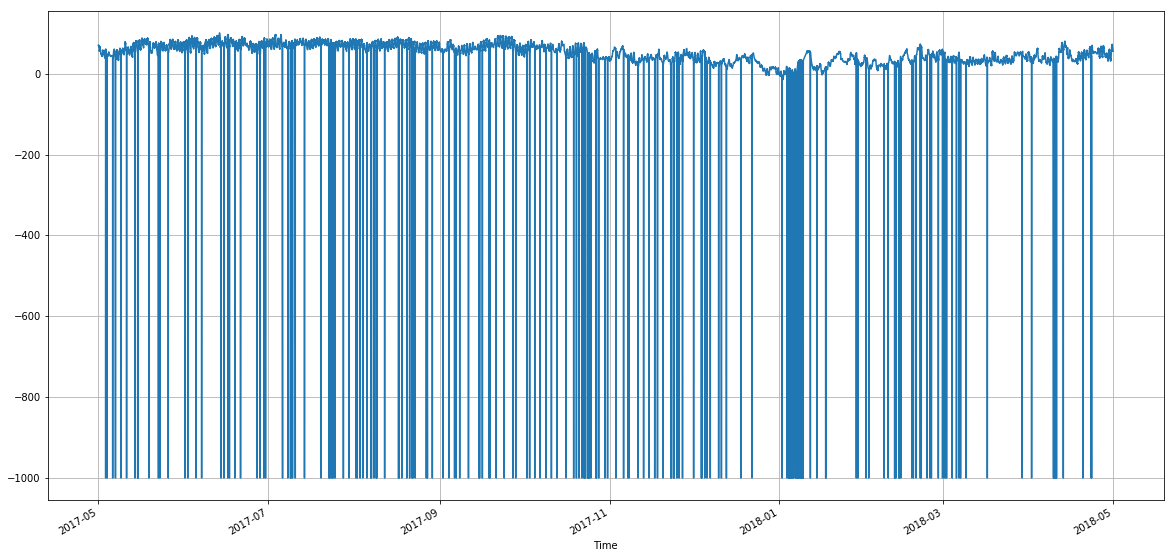

In [8]:
df.TemperatureF.plot()

### We have data with false, low values (negative values)

#### Let's convert those negative values as np.nan and then perform backward fill:

In [9]:
df[df['TemperatureF'] < -15] = np.nan
df.TemperatureF.fillna(method='bfill', inplace=True)

In [14]:
df.to_csv('KOHSIDNE4_weather_cleaned.csv')

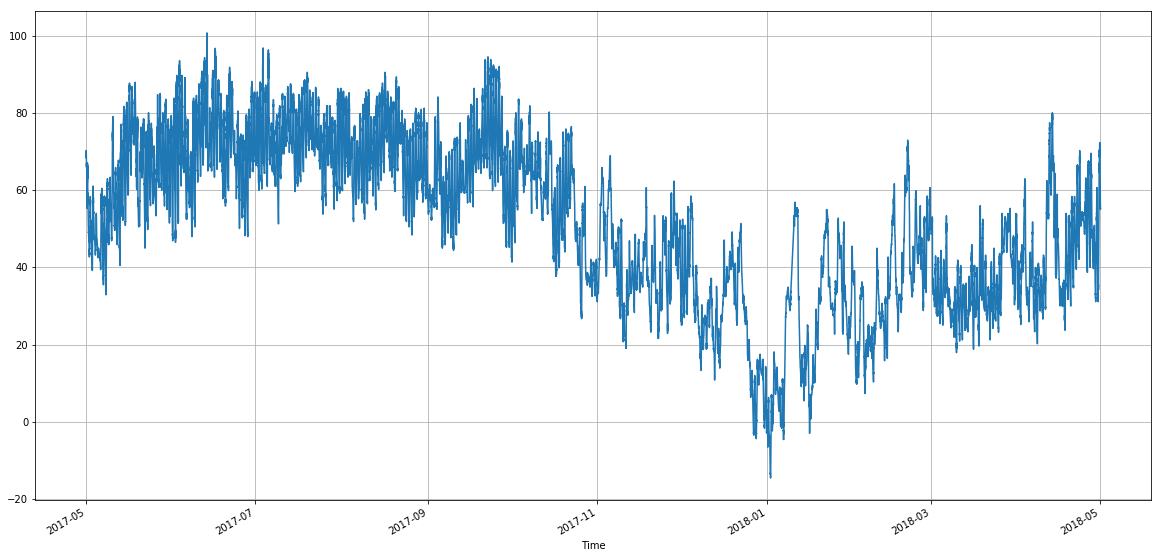

In [10]:
# Plot raw data points
df.TemperatureF.plot()

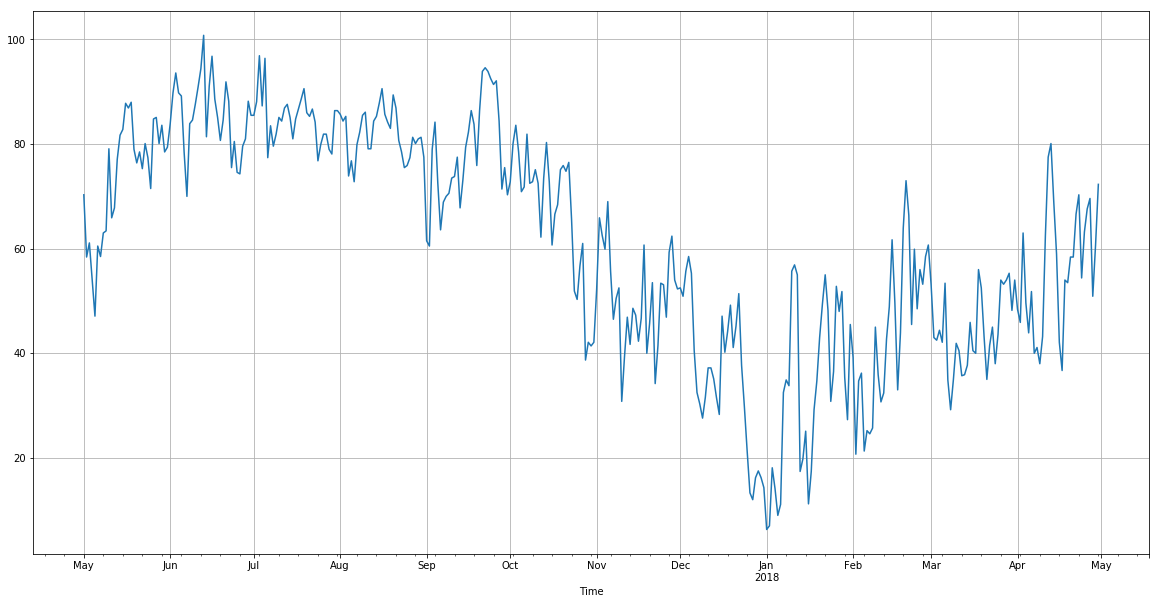

In [12]:
# Plot daily max temps
df.TemperatureF.resample('D').max().plot()